# Gradient descent in a sandpit

The supervisor of this building site doesn't have the time or patience to go digging in the sandpit herself.
She assigns this task to one of her workers, however they only follow very specific instructions.
The instructions take the form of a location to start searching from, and where to go subsequently if the phone is not found. The workers will try 5 further attempts after each click.

In this exercise you will look at such instructions, and see how good they are as a strategy for finding the supervisor's phone.

There is no grading for this exercise, when you are finished, close this tab to return to the course.

## Simple example
One idea for a set of instructions is, if you don't find the phone go one metre to the right and try again.
See how well (or badly) this works as a strategy.

Re-run the examples multiple times to make sure you didn't just get lucky!

<IPython.core.display.Javascript object>


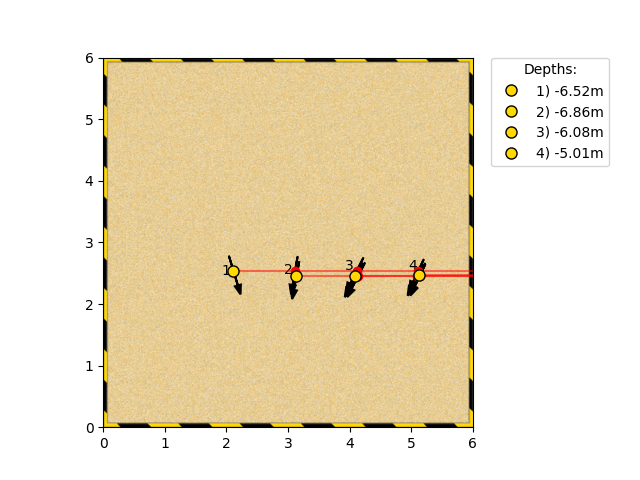

A Jupyter Widget

In [1]:
def next_step(f, J, H) :
    return np.array([1, 0])

# Click into this cell and press [Shift-Enter] to start.
%run "readonly/sandpit-exercises.ipynb"
sandpit_gradient(next_step)

## Steepest Descent

The previous strategy doens't use any of the information we have available, namely the depth of the pit, the Jacobian, or the Hessian.

We can do better by moving in a direction proportional to the Jacobian, down the slope.
We can set an *aggression* parameter, $\gamma$ for how big the jumps should be.
i.e. $\delta \mathbf{x} = -\gamma \mathbf{J} $

Feel free to try different values for $\gamma$.

/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


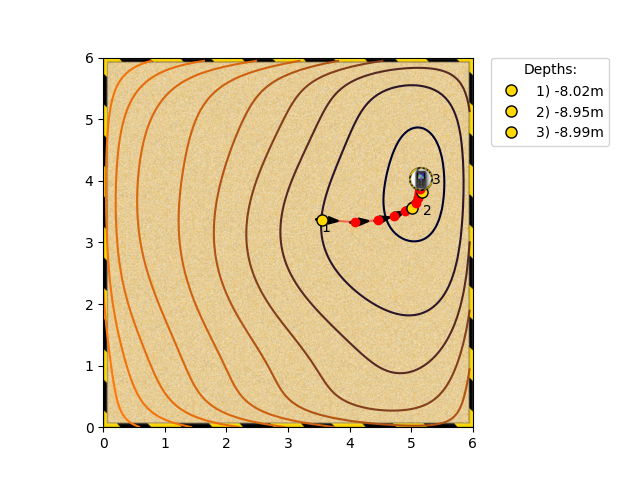

A Jupyter Widget

In [2]:
def next_step(f, J, H) :
    gamma = 0.5
    return -gamma * J

# Click into this cell and press [Shift-Enter] to start.
%run "readonly/sandpit-exercises.ipynb"
sandpit_gradient(next_step)

## Hessian

The trouble with the previous method is it is not always clear how big to set $\gamma$ to be.
Too big, and the jumps are too big, missing all the features.
Too small, and it will take too long to coverge.

A way of automatically determining the jump size, is to use the Hessian, i.e., the second derivative matrix.

Then, the step size can be given as,
$\delta \mathbf{x} = -\mathbf{H}^{-1}\mathbf{J}$

This not only sets the step size, but can also change the direction too.
Be careful, this method is just as likely to find maxima as it is mimima.

/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


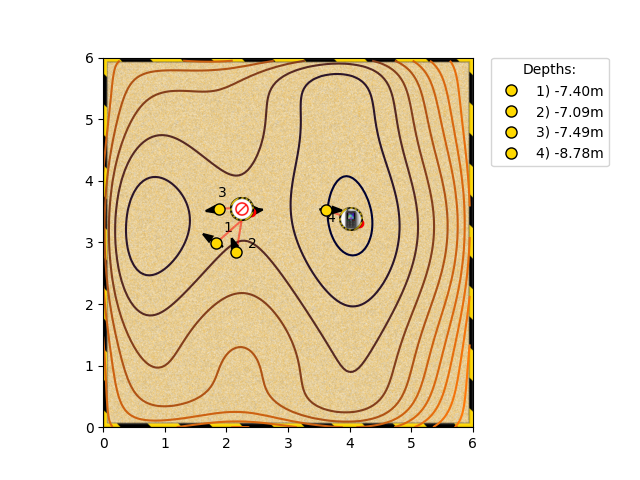

A Jupyter Widget

In [3]:
def next_step(f, J, H) :
    return -linalg.inv(H) @ J

# Click into this cell and press [Shift-Enter] to start.
%run "readonly/sandpit-exercises.ipynb"
sandpit_gradient(next_step)

## Hybrid method

You may have noticed, that if you are sufficiently close to a stationaty point already, the Hessian method will find it in relatively few steps.
Though in most cases, the step size is too large, and can even change the direction up hill.

We can try a hybrid method which tries the Hessian unless the step would be too big, or it would point backwards, in which case it goes back to using steepest descent.

See if you think this is any better.

/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


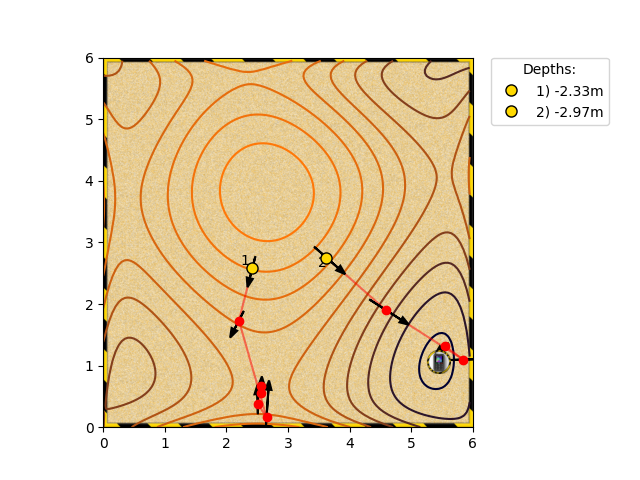

A Jupyter Widget

In [4]:
def next_step(f, J, H) :
    gamma = 0.5
    step = -linalg.inv(H) @ J
    if step @ -J <= 0 or linalg.norm(step) > 2 :
        step = -gamma * J
    return step

# Click into this cell and press [Shift-Enter] to start.
%run "readonly/sandpit-exercises.ipynb"
sandpit_gradient(next_step)

## Try your own

Feel free to modify the methods to see if you can find a better strategy to reliably find the phone.
Share your results in the forums with the discussion prompt.